In [3]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# 데이터 로드
# Kaggle에서 제공하는 "Mall_Customers.csv" 파일을 다운로드하고 같은 디렉토리에 저장하세요.
data = pd.read_csv('Mall_Customers.csv')

In [5]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
data.shape

(200, 5)

In [7]:
# 데이터 정규화
# 특성들의 단위를 무시하고 값으로 단순 비교할 수 있게 표준화가 필요
# 
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# K-Means 클러스터링 모델 생성
# k를 5로 설정하고 이후 적절한 k값 도출
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [9]:
data['Cluster'] = kmeans.labels_

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [11]:
# scaler.scale_ -> 
print(scaler.scale_)
# scaler.mean_ -> 
print(scaler.mean_)

[26.19897708 25.75888196]
[60.56 50.2 ]


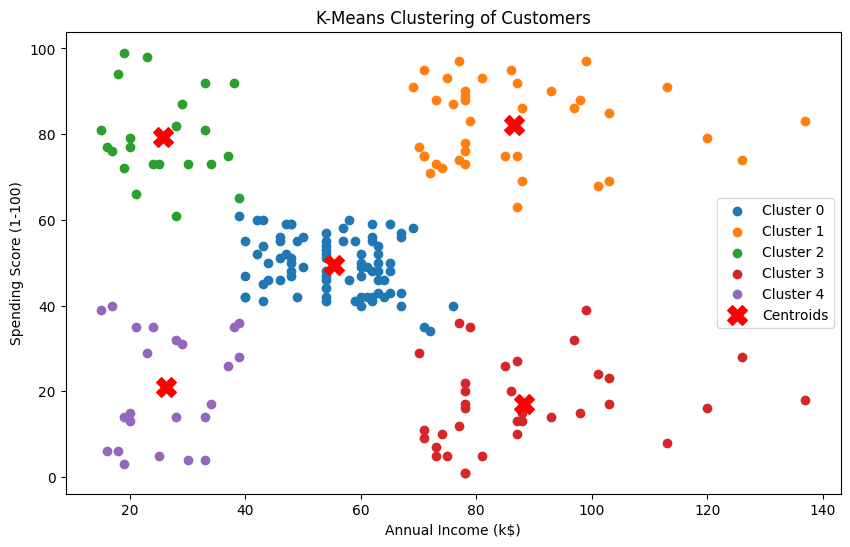

In [ ]:
# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
for cluster in range(5):
    # 클러스터별 데이터 필터링
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'], 
                label=f'Cluster {cluster}')

# 클러스터 중심 표시
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0] * scaler.scale_[0] + scaler.mean_[0], # 표준화 수식 z = (x - u)/q 를 역순으로, z = 표준화된 값, x = 원래 데이터, u = 평균값, q = 표준편차
            centroids[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
# 5. 각 클러스터의 기초 통계값 확인
cluster_stats = data.groupby('Cluster').describe()
print(cluster_stats)

        CustomerID                                                            \
             count        mean        std    min    25%    50%    75%    max   
Cluster                                                                        
0             81.0   86.320988  24.240889   44.0   66.0   86.0  106.0  143.0   
1             39.0  162.000000  22.803509  124.0  143.0  162.0  181.0  200.0   
2             22.0   23.090909  13.147185    2.0   12.5   23.0   33.5   46.0   
3             35.0  164.371429  21.457325  125.0  148.0  165.0  182.0  199.0   
4             23.0   23.000000  13.564660    1.0   12.0   23.0   34.0   45.0   

          Age             ... Annual Income (k$)         \
        count       mean  ...                75%    max   
Cluster                   ...                             
0        81.0  42.716049  ...              62.00   76.0   
1        39.0  32.692308  ...              95.00  137.0   
2        22.0  25.272727  ...              32.25   39.0   
3    